# Course Code: DS4003 
# Course Name: Principles and Techniques for Data Science 
# Lab Session: 02 - Data Visualization

### Some contents in the lab are adapted from UC Berkeley's Data100 course

In [2]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('display.precision', 2)

C:\Users\victo\AppData\Local\Temp\ipykernel_15032\3837146908.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
%matplotlib inline

## What tools can we use for visualization? 
1. seaborn (plotting)
2. matplotlib (plotting, image visualization)

## Seaborn

Seaborn is the primary visualization library we will use for this course. Seaborn is a Python library for visualizing data. It delivers an intuitive way to create compelling and informative statistical charts and graphs You can read more about seaborn here: https://seaborn.pydata.org/api.html

We will also use the tips dataset from the seaborn library. Some details about the dataset can be found here https://rdrr.io/cran/reshape2/man/tips.html

In [4]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


Now we will start looking at the various types of plots available in seaborn. The common usage is:
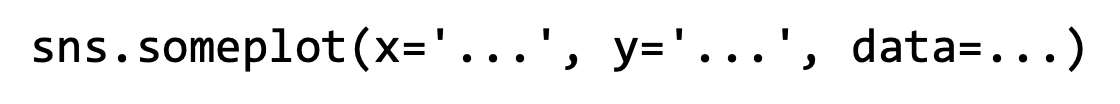

## 1. displot is a function to plot the distribution of data. Using the a help() function can give you further details about how to use a the plotting function.


In [5]:
help(sns.displot)

Help on function displot in module seaborn.distributions:

displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing distribution plots onto a FacetGrid.

    This function provides access to several approaches for visualizing the
    univariate or bivariate distribution of data, including subsets of data
    defined by semantic mapping and faceting across multiple subplots. The
    ``kind`` parameter selects the approach to use:

    - :func:`histplot` (with ``kind="hist"``; the default)
    - :func:`kdeplot` (with ``kind="kde"``)
    - :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)

    Additionally, a :func:`rugplot` can be added to any kind of plot to show
    individual observations.

    Extra k

### We will start by visualizing the distribution of the variable 'total_bill' with a distplot. Change the parameters of displot function and see what happens

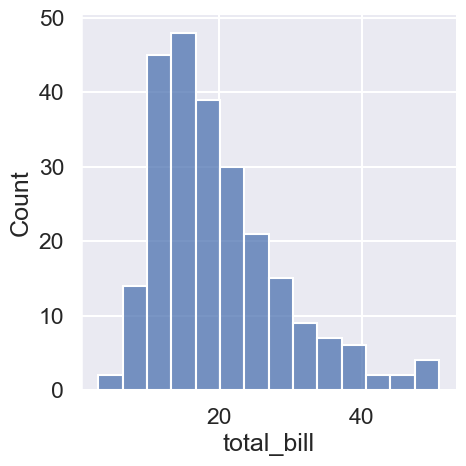

In [6]:
sns.displot(tips, x='total_bill', kind="hist")

## Grouping is done automatically in seaborn
Most seaborn methods use the `x` and `y` arguments. Notice that the grouping is done automatically! This is why we use tidy data for seaborn.

In [7]:
tips[['day', 'total_bill']]

,day,total_bill
0,Sun,16.99
1,Sun,10.34
2,Sun,21.01
...,...,...
241,Sat,22.67
242,Sat,17.82
243,Thur,18.78


## 2. barplots can be used to represent categorical data with rectangular bars

### Task: Use a barplot to visualize the total amount of bills per day

<Axes: xlabel='day', ylabel='total_bill'>

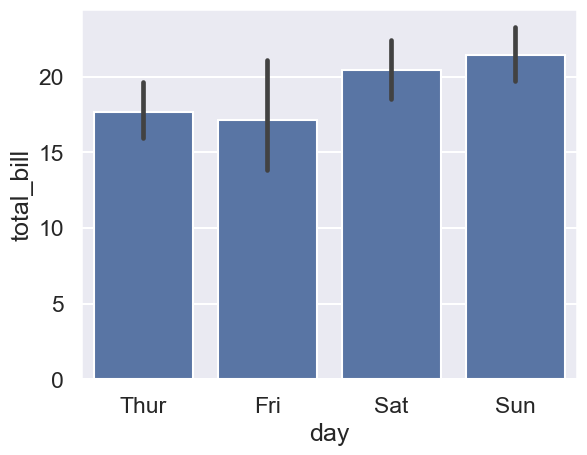

In [8]:
# YOUR CODE HERE
data = tips[['day', 'total_bill']]
sns.barplot(data, x=data['day'], y=data['total_bill'])

### Sometimes we can also visualize more than two variables in a barplot. Hint: Take a look at the hue parameter.

In [9]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', capsize=0, err_kws=None, ci=<deprecated>, errcolor=<deprecated>, errwidth=<deprecated>, ax=None, **kwargs)
    Show point estimates and errors as rectangular bars.

    A bar plot represents an aggregate or statistical estimate for a numeric
    variable with the height of each rectangle and indicates the uncertainty
    around that estimate using an error bar. Bar plots include 0 in the
    axis range, and they are a good choice when 0 is a meaningful value
    for the variable to take.

    See the :ref:`tutorial <categorical_tutorial>` for more information.

    .. note::
        By defa

### Task: Use a barplot to visualize the amount of tips and the day on which they were given. Additionally, visualize whether the record belongs to a smoker or non-smoker in the plot.

<Axes: xlabel='day', ylabel='tip'>

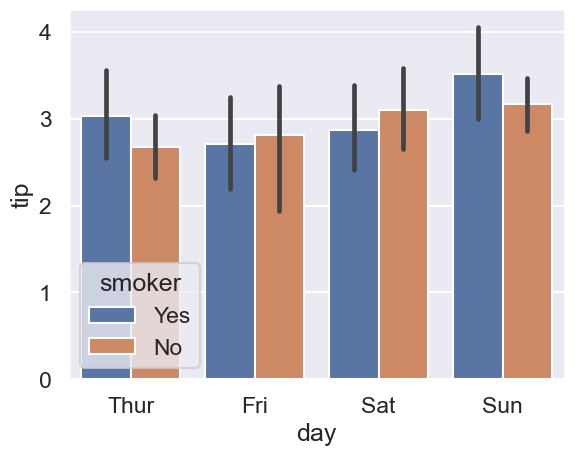

In [10]:
### YOUR CODE HERE

sns.barplot(tips, x=tips['day'], y=tips['tip'], hue=tips['smoker'])


## 3. Scatter plots are mostly suited for visualizing the relationship between two continuous variables.

### Task: Use a scatterplot to amount of tips and the total amount of bills.

<Axes: xlabel='total_bill', ylabel='tip'>

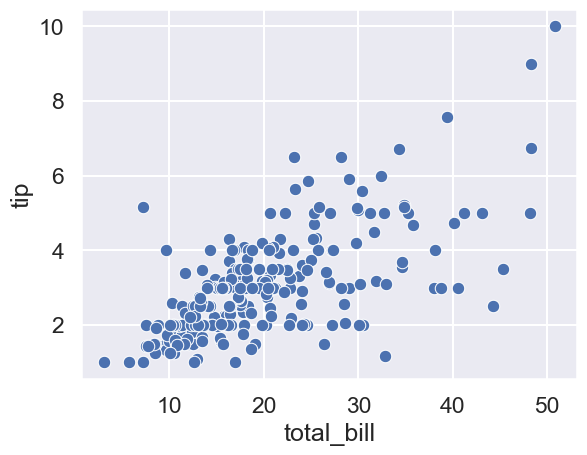

In [11]:
## YOUR CODE HERE
data = tips[['total_bill', 'tip']]
sns.scatterplot(data, x=data['total_bill'], y=data['tip'])

## 4. Boxplots are used to compare distributions of variables.

### Task: Use a boxplots to visualize the total amount of bills and the day they were given.

<Axes: xlabel='total_bill', ylabel='day'>

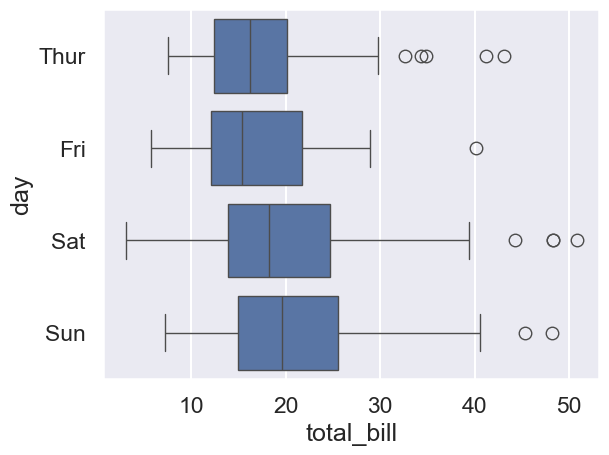

In [12]:
## YOUR CODE HERE
data = tips[['total_bill', 'day']]
sns.boxplot(data, x=data['total_bill'], y=data['day'])

## 5. KDE plots are used to estimate a probability density function from a set of data


An example is given below.

<Axes: xlabel='size', ylabel='Density'>

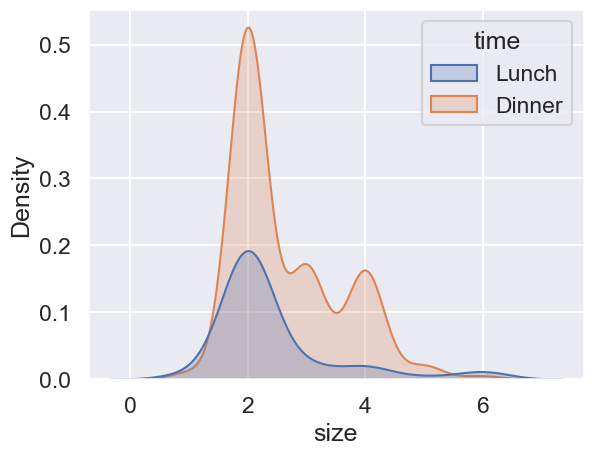

In [13]:
sns.kdeplot(data=tips, x='size', hue='time', fill=True)

### Task: How can you use sns.kdeplot to create a kernel density estimate plot that shows the relationship between "size" and "total_bill" in the tips dataset, with different colors representing different times of day?

<Axes: xlabel='size', ylabel='total_bill'>

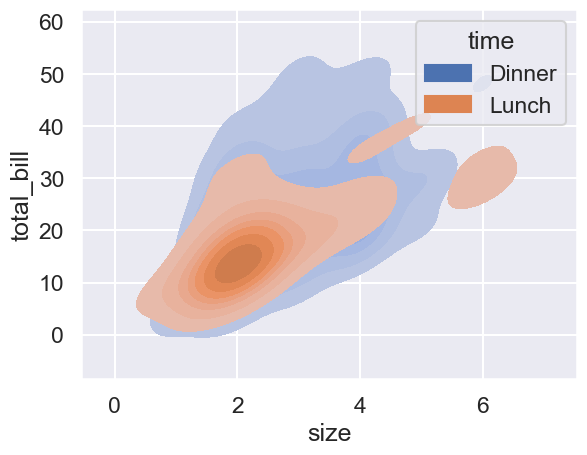

In [14]:
## YOUR CODE HERE
data = tips[['size', 'total_bill', 'time']]
sns.kdeplot(data, x=data['size'], y=data['total_bill'], hue=data['time'], hue_order=['Dinner', 'Lunch'], fill=True)

## 6. Heatmaps are another interesting visualization method used to identify patterns and correlations in data.  In a heatmap, each cell's color intensity corresponds to a data value, making it easy to visually compare relationships between different variables or categories

### Here we will try to visualize the correlation between a subset of the variables in the tips datset.

In [15]:
subset=tips[['total_bill', 'tip','size']]

<Axes: >

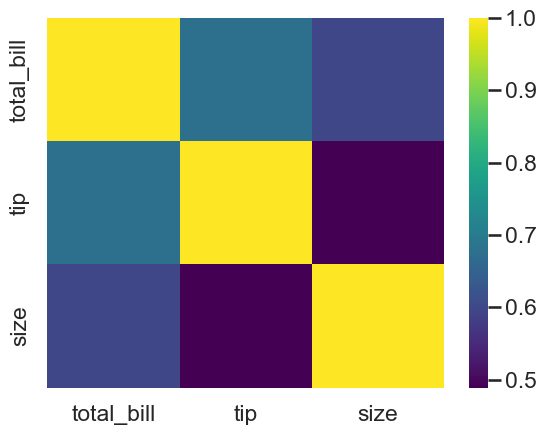

In [16]:
subset.corr()
sns.heatmap(subset.corr(), cmap='viridis')

## 7. Lmplots can be used to visualize the relationship between two continuous variables, often with a regression line fit to the data.

### Let's visualize the relationship between total bills and the amount of tip given.

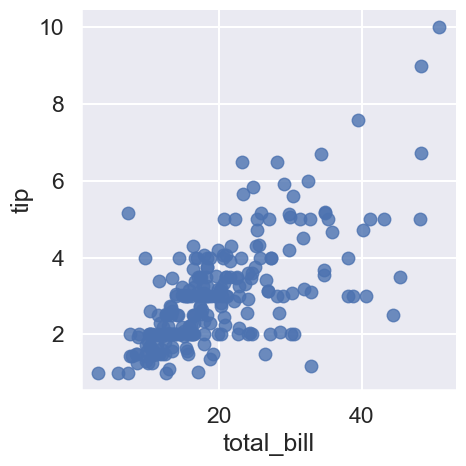

In [17]:
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False)

### Task: Modify the plot to include a regression line.

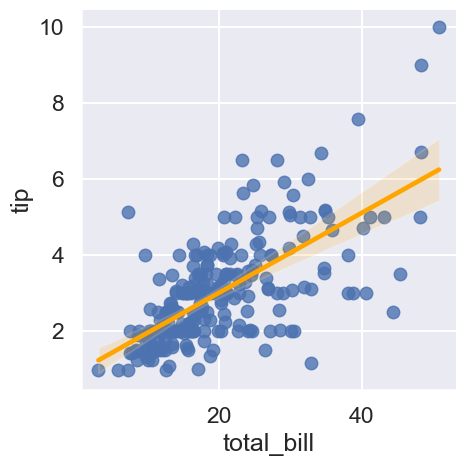

In [18]:
## YOUR CODE HERE
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=True, line_kws={'color':'orange'})

### Here we use the lmplot to visualize the relationship between the total amount of the bill and the tips given. The plot also shows the total bill and tips per the sex the customer as well as whether the customer is smoker or not. Go through the documentation on lmplots to gain a better understanding.

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


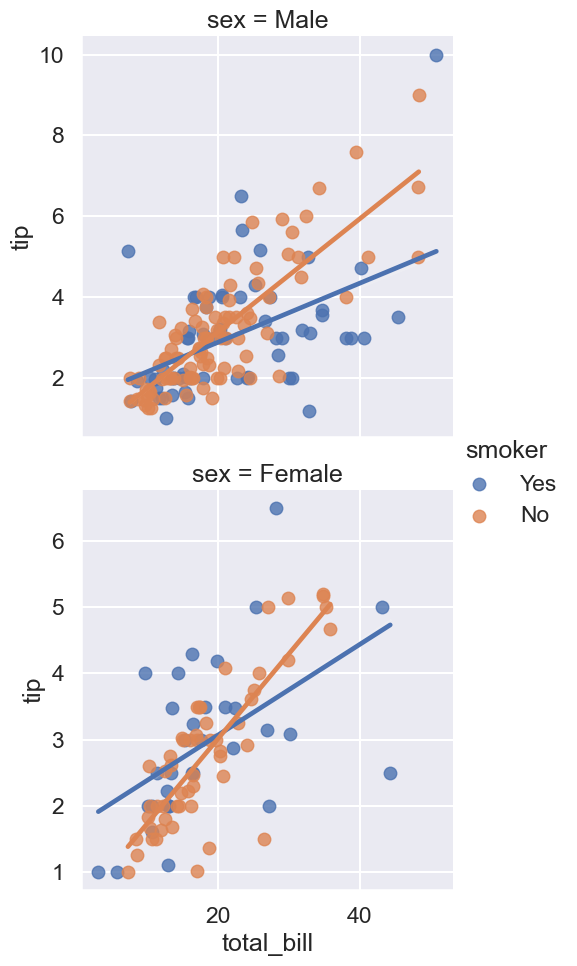

In [19]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           row='sex', sharey=False, ci=False,
           data=tips)

### Task: Modify the plot  above to show the day on which the tips were given.

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


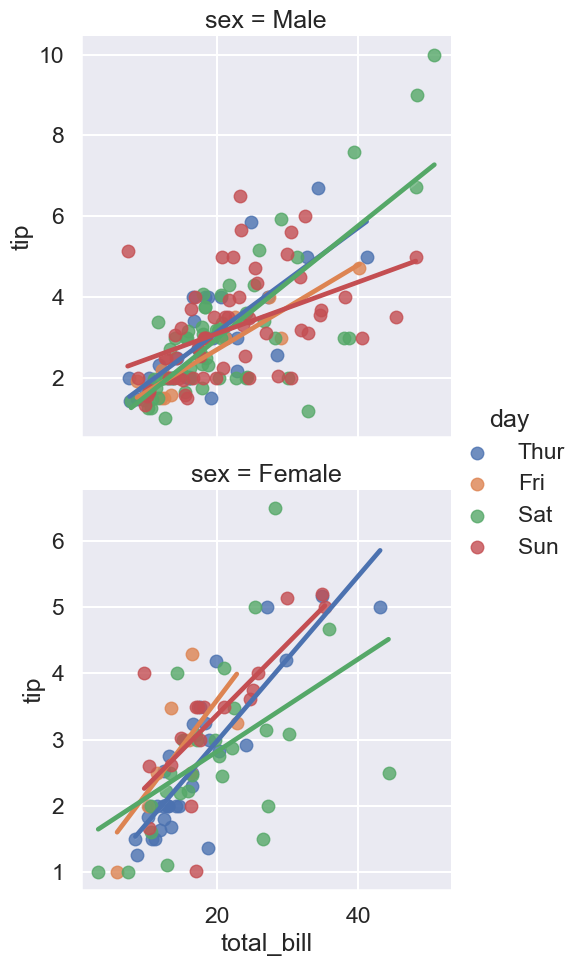

In [20]:
## YOUR CODE HERE

sns.lmplot(x="total_bill", y="tip", hue="day",
           row='sex', sharey=False, ci=False,
           data=tips)


## 8. Relplots are another useful type of plot in Seaborn that focuses on visualizing the relationships between two or more variables in a dataset.

Before we look at this, we will use a different dataset, the FMRI dataset. The FMRI dataset in Seaborn is a sample dataset that captures brain activity during an experiment.

In [21]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-1.76e-02
1,s5,14,stim,parietal,-8.09e-02
2,s12,18,stim,parietal,-8.10e-02
...,...,...,...,...,...
1061,s12,7,cue,frontal,-4.94e-03
1062,s11,7,cue,frontal,-2.54e-02
1063,s0,0,cue,parietal,-6.90e-03


In [22]:
help(sns.relplot)

Help on function relplot in module seaborn.relational:

relplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, weights=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing relational plots onto a FacetGrid.

    This function provides access to several different axes-level functions
    that show the relationship between two variables with semantic mappings
    of subsets. The `kind` parameter selects the underlying axes-level
    function to use:

    - :func:`scatterplot` (with `kind="scatter"`; the default)
    - :func:`lineplot` (with `kind="line"`)

    Extra keyword arguments are passed to the underlying function, so you
    should refer to the documentation for each to see kind-specifi

### we will use a relplot to visualize the relationship between  the timepoint of the scan and the brain signal.

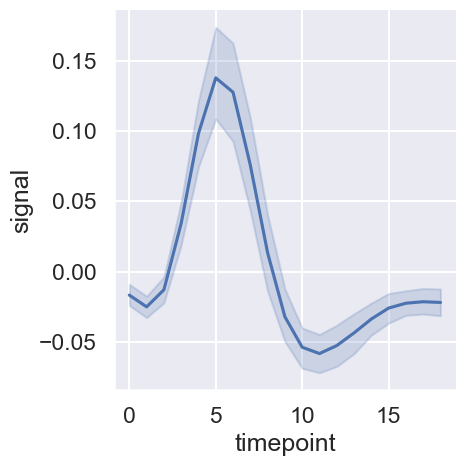

In [23]:
sns.relplot(x="timepoint", y="signal", kind="line",
           data=fmri)

### Task: How can you use sns.relplot to create a line plot that shows "timepoint" vs. "signal," with "event" represented by different colors and styles, and split the plot by "region" using the fmri dataset?

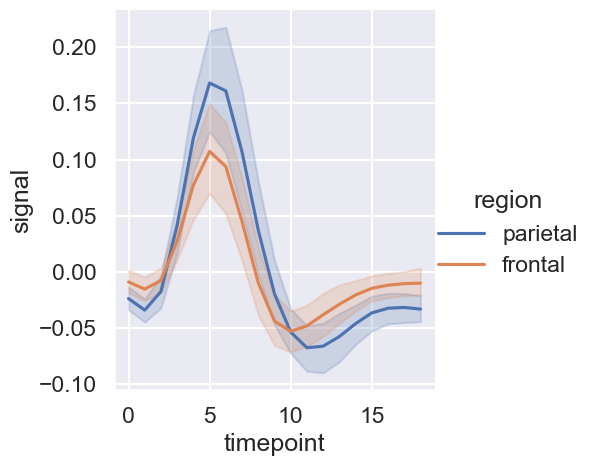

In [24]:
## YOUR CODE HEREd
sns.relplot(x="timepoint", y="signal", kind="line", hue="region",
           data=fmri)

Seaborn also comes with a few built-in plot styles to adjust the colors in the plot:

In [25]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

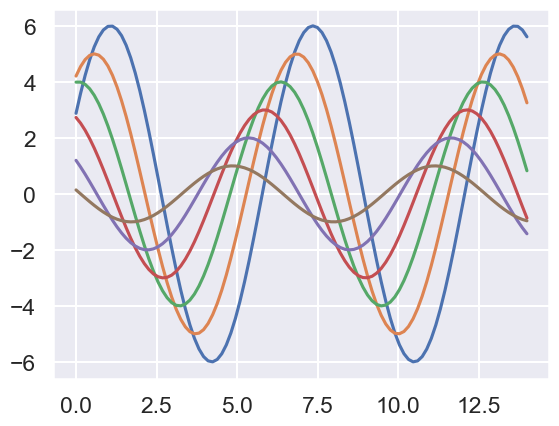

In [26]:
sinplot()

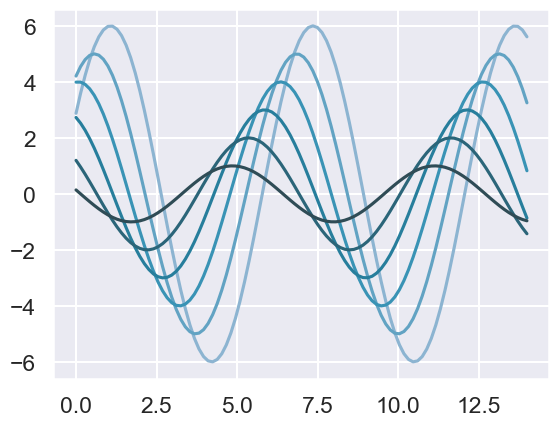

In [27]:
with sns.color_palette("PuBuGn_d"):
    sinplot()

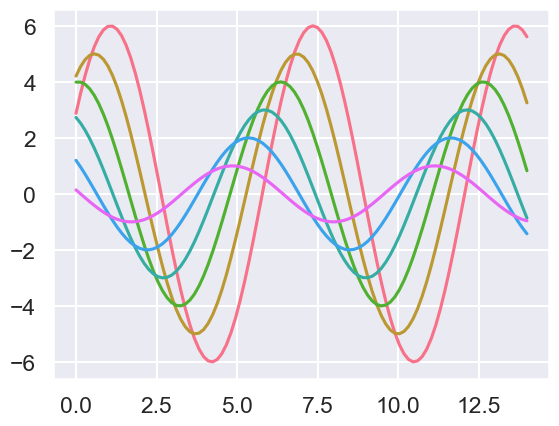

In [28]:
with sns.color_palette("husl"):
    sinplot()

## Matplotlib

matplotlib is the underlying library behind most of the Python plotting ecosystem. It provides low-level drawing functionality that we need to make detailed adjustments to our plots. This library is very large and we won't cover all of it during the lab session.

For further reading:

* The [official matplotlib documentation](https://matplotlib.org/contents.html) is detailed and comprehensive. Particularly useful sections are:
  - The [gallery](https://matplotlib.org/gallery/index.html).
  - The [high level overview of its dual APIs, `pyplot` and object-oriented](https://matplotlib.org/api/pyplot_summary.html).
  - The [topical tutorials](https://matplotlib.org/tutorials/index.html).


* A detailed [tutorial](https://www.labri.fr/perso/nrougier/teaching/matplotlib) by Nicolas Rougier.
* The fantastic [Python Graph Gallery](https://python-graph-gallery.com), which provides a large collection of plots with emphasis on statistical visualizations.  It uses [Seaborn](https://seaborn.pydata.org) extensively.


## Matplotlib's main APIs: ``pyplot`` and object-oriented

Matplotlib is a library that can be thought of as having two main ways of being
used:

- via ``pyplot`` calls, as a high-level, matlab-like library that automatically
  manages details like figure creation.

- via its internal object-oriented structure, that offers full control over all
  aspects of the figure, at the cost of slightly more verbose calls for the
  common case.

The pyplot api:

- Easiest to use.
- Sufficient for simple and moderately complex plots.
- Does not offer complete control over all details.

Before we look at our first simple example, we must activate matplotlib support in the notebook:

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


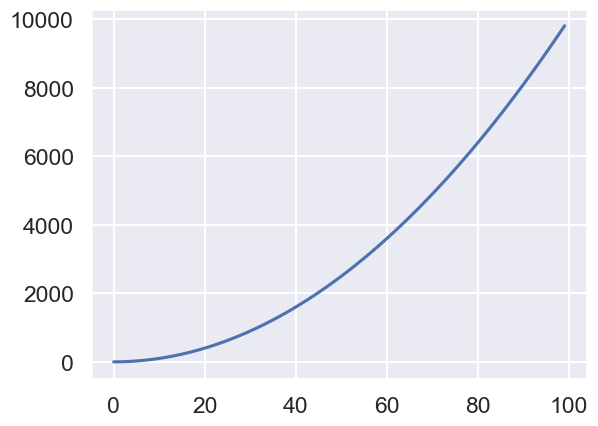

In [30]:
xs = np.arange(0, 100)
ys = xs ** 2
plt.plot(xs, ys)

The `plt` module has useful methods for adding labels and legends to plots. Lets take a loot at an example below:

Text(0, 0.5, 'y')

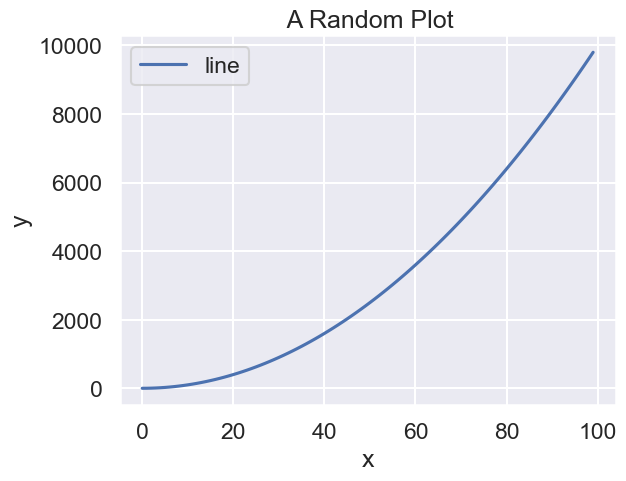

In [31]:

plt.plot(xs, ys, label='line')
plt.legend()
plt.title(' A Random Plot')
plt.xlabel('x')
plt.ylabel('y')


###  Task: Plot both the sine and cosine functions on the same graph, add labels for each function, and include a title, axis labels, and a legend using matplotlib?

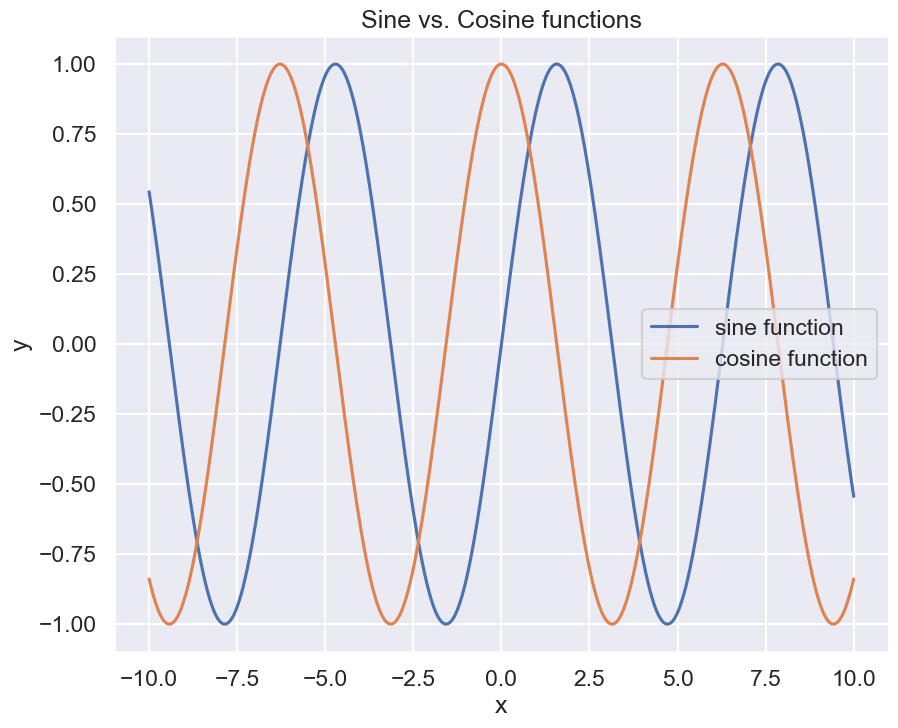

In [32]:
## YOUR CODE HERE
range = np.linspace(-10, 10, 1000)
sine = np.sin(range)
cosine = np.cos(range)

plt.figure(figsize=(10,8))
plt.plot(range, sine, label='sine function')
plt.plot(range, cosine, label='cosine function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine vs. Cosine functions')
plt.legend()
plt.show()

###  Task: Now try to add a second figure in a separate plot with a simple sin(2x) function.

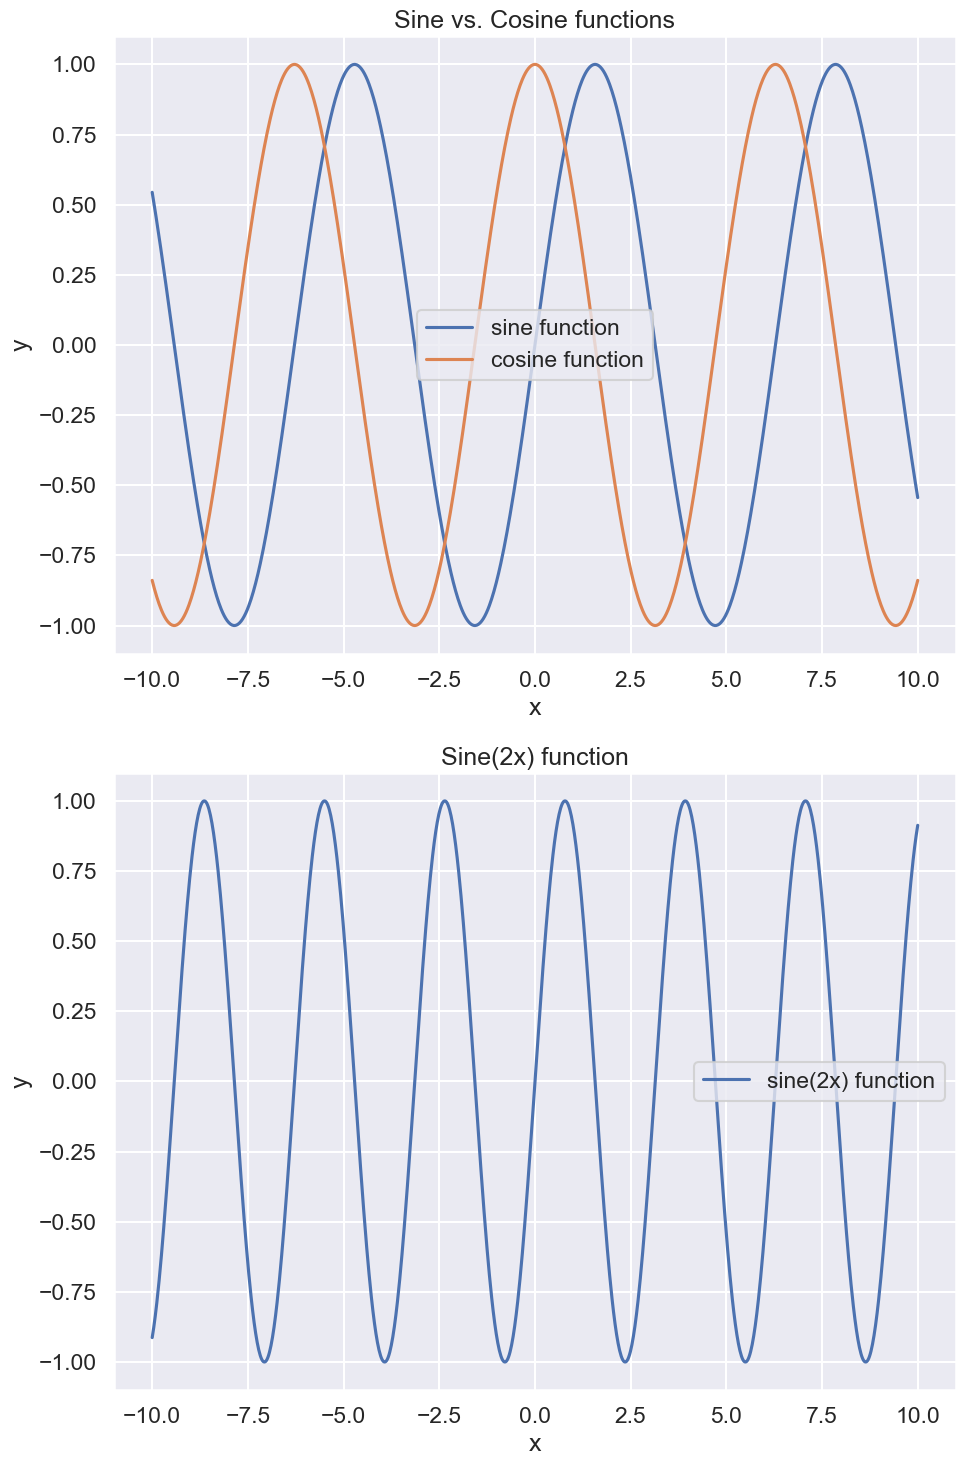

In [33]:
## YOUR CODE HERE
range = np.linspace(-10, 10, 1000)
sine = np.sin(range)
cosine = np.cos(range)
sine_2x = np.sin(range*2)

fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax.plot(range, sine, label='sine function')
ax.plot(range, cosine, label='cosine function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Sine vs. Cosine functions')
ax.legend()

ax2.plot(range, sine_2x, label='sine(2x) function')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Sine(2x) function')
ax2.legend()

plt.tight_layout()
plt.show()

## Making subplots


The simplest command is:

    f, ax = plt.subplots()

which is equivalent to:

    f = plt.figure()
    ax = f.add_subplot(111)

By passing arguments to `subplots`, you can easily create a regular plot grid:

Here is how to create the same two plots, using explicit management of the figure and axis objects:

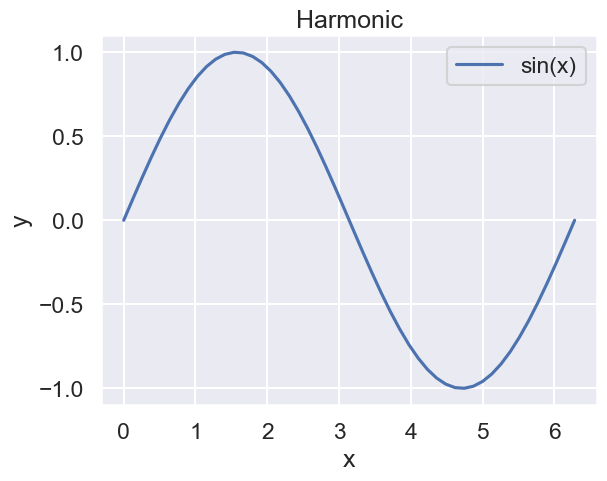

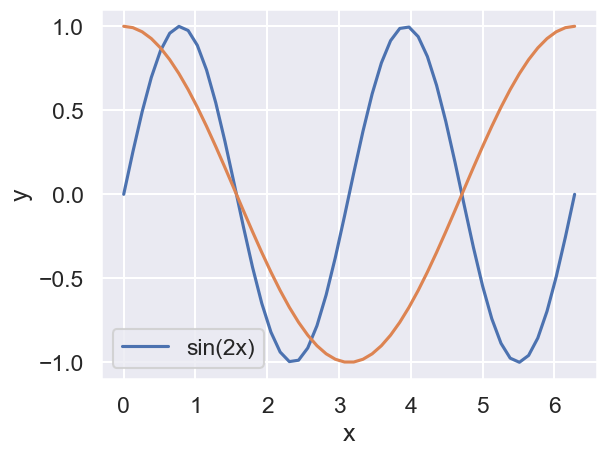

In [34]:
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
f, ax = plt.subplots()  # we manually make a figure and axis
ax.plot(x,y, label='sin(x)')  
ax.legend()
ax.set_title('Harmonic')  
ax.set_xlabel('x')  
ax.set_ylabel('y')


f1, ax = plt.subplots() # Make a second figure with a simple plot.  
ax.plot(x, np.sin(2*x), label='sin(2x)')
ax.set_xlabel('x')  
ax.set_ylabel('y')
ax.legend()
z = np.cos(x)

# Since we now have variables for each axis, we can add back to the first
# figure even after making the second
ax.plot(x, z, label='cos(x)');

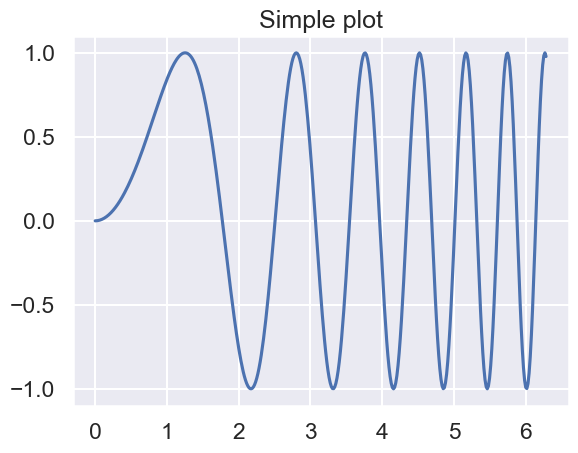

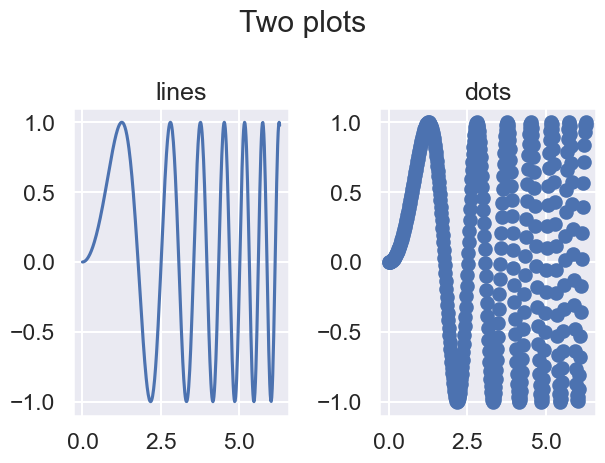

In [35]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)


f, ax = plt.subplots() # Just a figure and one subplot
ax.plot(x, y)
ax.set_title('Simple plot')


f, (ax, ax2) = plt.subplots(1, 2) # Two subplots, unpack the output array immediately
ax.plot(x, y)
ax.set_title('lines')
ax2.scatter(x, y)
ax2.set_title('dots')


f.suptitle('Two plots')
plt.tight_layout() # Ask matplotlib to auto-adjust whitespace surrounding axes

And finally, an arbitrarily complex grid can be made with ``subplot2grid``:

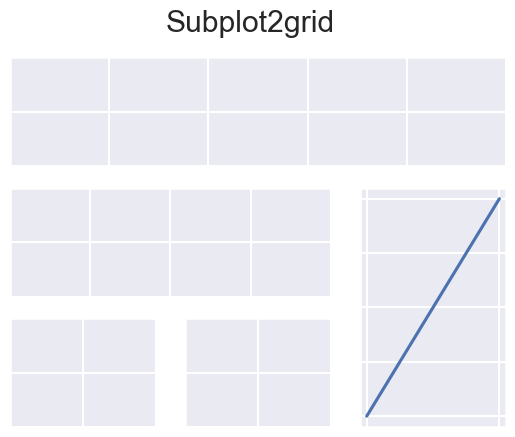

In [36]:
f = plt.figure()
ax = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2, 0))
ax5 = plt.subplot2grid((3,3), (2, 1))


for ax in f.axes:# Let's turn off visibility of all tick labels here
    for t in ax.get_xticklabels()+ax.get_yticklabels():
        t.set_visible(False)


f.suptitle('Subplot2grid') # And add a figure-level title at the top


ax3.plot([1, 2, 3]); # Plot something at the bottom right

## Manipulating properties across matplotlib

In matplotlib, most properties for lines, colors, etc, can be set directly in
the call:

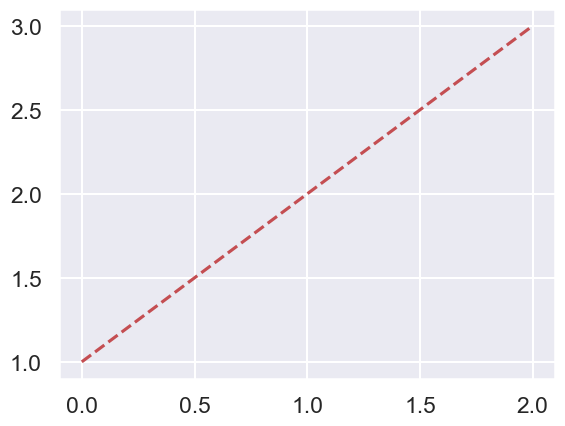

In [37]:
plt.plot([1,2,3], linestyle='--', color='r')

But for finer control you can get a hold of the returned line object (more on
these objects later):

    In [1]: line, = plot([1,2,3])

These line objects have a lot of properties you can control, a full list is
seen here by tab-completing in IPython:

    In [2]: line.set
    line.set                     line.set_drawstyle           line.set_mec
    line.set_aa                  line.set_figure              line.set_mew
    line.set_agg_filter          line.set_fillstyle           line.set_mfc
    line.set_alpha               line.set_gid                 line.set_mfcalt
    line.set_animated            line.set_label               line.set_ms
    line.set_antialiased         line.set_linestyle           line.set_picker
    line.set_axes                line.set_linewidth           line.set_pickradius
    line.set_c                   line.set_lod                 line.set_rasterized
    line.set_clip_box            line.set_ls                  line.set_snap
    line.set_clip_on             line.set_lw                  line.set_solid_capstyle
    line.set_clip_path           line.set_marker              line.set_solid_joinstyle
    line.set_color               line.set_markeredgecolor     line.set_transform
    line.set_contains            line.set_markeredgewidth     line.set_url
    line.set_dash_capstyle       line.set_markerfacecolor     line.set_visible
    line.set_dashes              line.set_markerfacecoloralt  line.set_xdata
    line.set_dash_joinstyle      line.set_markersize          line.set_ydata
    line.set_data                line.set_markevery           line.set_zorder
    

But the `setp` call (short for set property) can be very useful, especially
while working interactively because it contains introspection support, so you
can learn about the valid calls as you work:

    In [7]: line, = plot([1,2,3])

    In [8]: setp(line, 'linestyle')
      linestyle: [ ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''`` ]         and any drawstyle in combination with a linestyle, e.g. ``'steps--'``.         

    In [9]: setp(line)
      agg_filter: unknown
      alpha: float (0.0 transparent through 1.0 opaque)         
      animated: [True | False]         
      antialiased or aa: [True | False]
      ...
      ... much more output elided
      ...

In the first form, it shows you the valid values for the 'linestyle' property,
and in the second it shows you all the acceptable properties you can set on the
line object.  This makes it very easy to discover how to customize your figures
to get the visual results you need.

Furthermore, setp can manipulate multiple objects at a time:

[None, None, None, None]

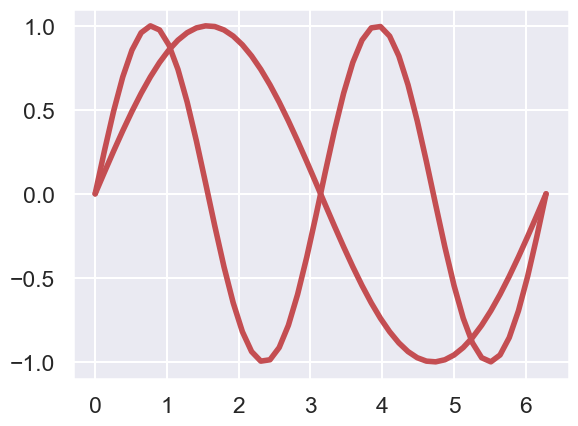

In [38]:
x = np.linspace(0, 2*np.pi)
y1 = np.sin(x)
y2 = np.sin(2*x)
lines = plt.plot(x, y1, x, y2)


plt.setp(lines, linewidth=4, color='r') # We will set the width and color of all lines in the figure at once:

Finally, if you know what properties you want to set on a specific object, a
plain ``set`` call is typically the simplest form:

[None, None, None]

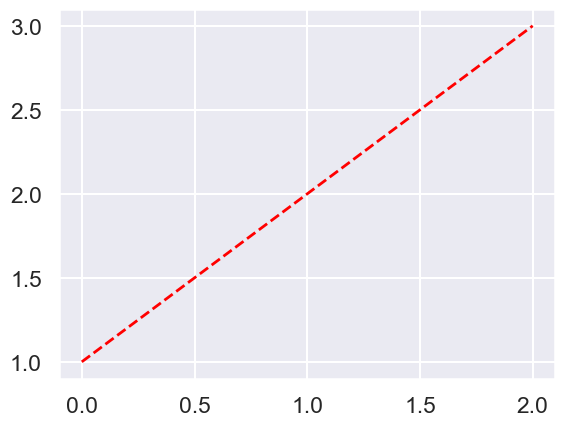

In [39]:
line, = plt.plot([1,2,3])
line.set(lw=2, c='red', ls='--')

## Understanding what matplotlib returns: lines, axes and figures


### Lines


In a simple plot:

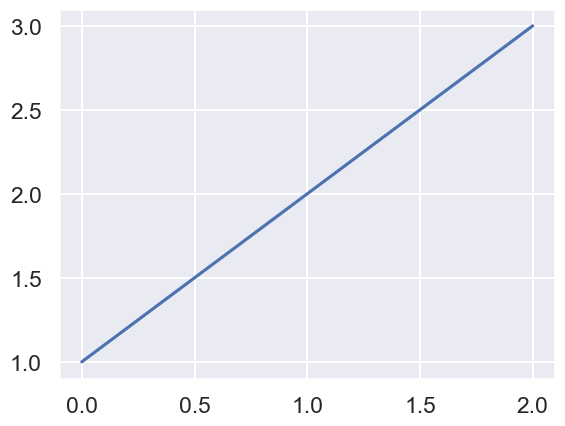

In [40]:
plt.plot([1,2,3])

The return value of the plot call is a list of lines, which can be manipulated
further.  If you capture the line object (in this case it's a single line so we
use a one-element tuple):

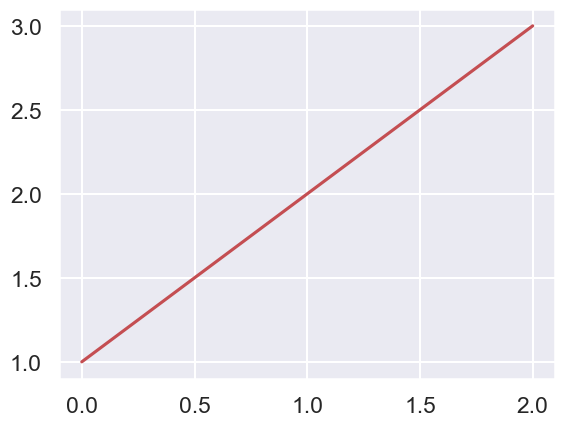

In [41]:
line, = plt.plot([1,2,3])
line.set_color('r')

One line property that is particularly useful to be aware of is ``set_data``:

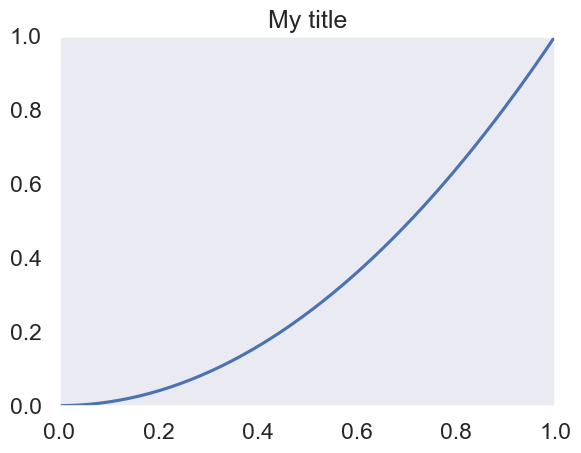

In [42]:
# Create a plot and hold the line object
line, = plt.plot([1,2,3], label='my data')
plt.grid(False)
plt.title('My title')

# ... later, we may want to modify the x/y data but keeping the rest of the
# figure intact, with our new data:
x = np.linspace(0, 1)
y = x**2

# This can be done by operating on the data object itself
line.set_data(x, y)

# Now we must set the axis limits manually. Note that we can also use xlim
# and ylim to set the x/y limits separately.
plt.axis([0,1,0,1])

# Note, alternatively this can be done with:
ax = plt.gca()  # get currently active axis object
ax.relim()
ax.autoscale_view()

### The next important component, axes

   
The ``axis`` call above was used to set the x/y limits of the axis.  And in
previous examples we called ``.plot`` directly on axis objects.  Axes are the
main object that contains a lot of the user-facing functionality of matplotlib:

    In [16]: fig, ax = plt.subplots()

    In [17]: ax.
    Display all 299 possibilities? (y or n)
    ax.acorr                                 ax.hitlist
    ax.add_artist                            ax.hlines
    ax.add_callback                          ax.hold
    ax.add_collection                        ax.ignore_existing_data_limits
    ax.add_line                              ax.images
    ax.add_patch                             ax.imshow
    
    ... etc.

Many of the commands in ``plt.<command>`` are nothing but wrappers around axis
calls, with machinery to automatically create a figure and add an axis to it if
there wasn't one to begin with.  The output of most axis actions that draw
something is a collection of lines (or other more complex geometric objects).

### Enclosing it all, the figure


The enclosing object is the ``figure``, that holds all axes:

    In [12]: fig, ax = plt.subplots(2, 1)

    In [13]: ax.shape
    Out[13]: (2,)

    In [14]: fig.axes
    Out[14]: 
    [<matplotlib.axes._subplots.AxesSubplot at 0x117c2c048>,
     <matplotlib.axes._subplots.AxesSubplot at 0x115739f98>]


**The basic view of matplotlib is: a figure contains one or more axes, axes draw
and return collections of one or more geometric objects (lines, patches, etc).**

For all the gory details on this topic, see the matplotlib [artist tutorial](http://matplotlib.sourceforge.net/users/artists.html), or the [chapter about matplotlib](http://aosabook.org/en/matplotlib.html) by its original author, John Hunter and core dev Michael Droetboom, in "The Architecture of Open Source Applications", which contains these useful diagrams:

## 3D Plots

Matplotlib also offers support for 3D plots. 3D plots extend traditional two-dimensional plots into three dimensions, allowing for a more comprehensive view of data. These plots are particularly useful when dealing with datasets that involve three continuous variables or when trying to understand relationships in multi-dimensional data.

Let's start with a simple 3d plot of random numbers.


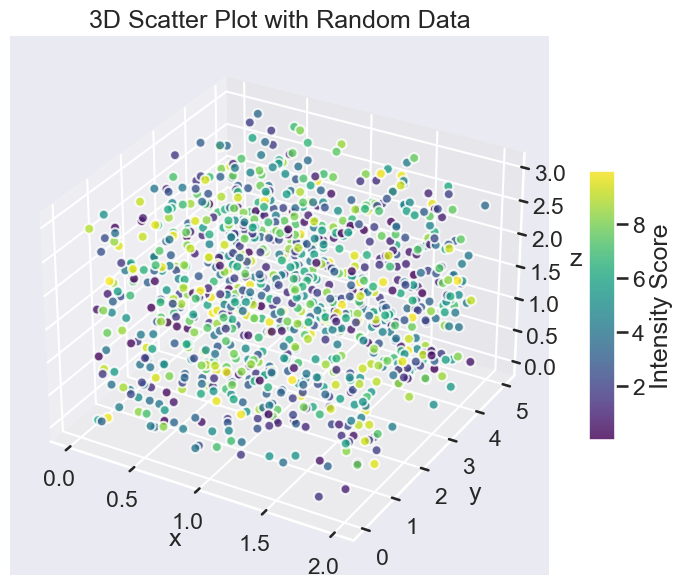

In [43]:
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)  
x = np.random.rand(1000) * 2 
y = np.random.rand(1000) * 5  
z = np.random.rand(1000) * 3
colors = np.random.rand(1000) * 10 


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=colors, cmap='viridis', s=50, alpha=0.8, edgecolors='w')


cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Intensity Score')


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Scatter Plot with Random Data')

plt.show()

In [59]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Task: Visualize the tips dataset using a 3D plot

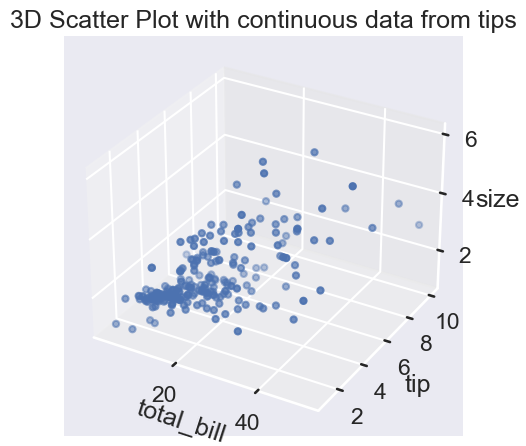

In [58]:
### YOUR CODE HERE
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tips['total_bill'], tips['tip'], tips['size'])

ax.set_xlabel('total_bill')
ax.set_ylabel('tip')
ax.set_zlabel('size')
ax.set_title('3D Scatter Plot with continuous data from tips')

plt.tight_layout()
plt.show()

## Aribitrary text and LaTeX support

In matplotlib, text can be added either relative to an individual axis object
or to the whole figure.

These commands add text to the Axes:

- title() - add a title
- xlabel() - add an axis label to the x-axis
- ylabel() - add an axis label to the y-axis
- text() - add text at an arbitrary location
- annotate() - add an annotation, with optional arrow

And these act on the whole figure:

- figtext() - add text at an arbitrary location
- suptitle() - add a title

And any text field can contain LaTeX expressions for mathematics, as long as
they are enclosed in ``$`` signs.

This example illustrates all of them:

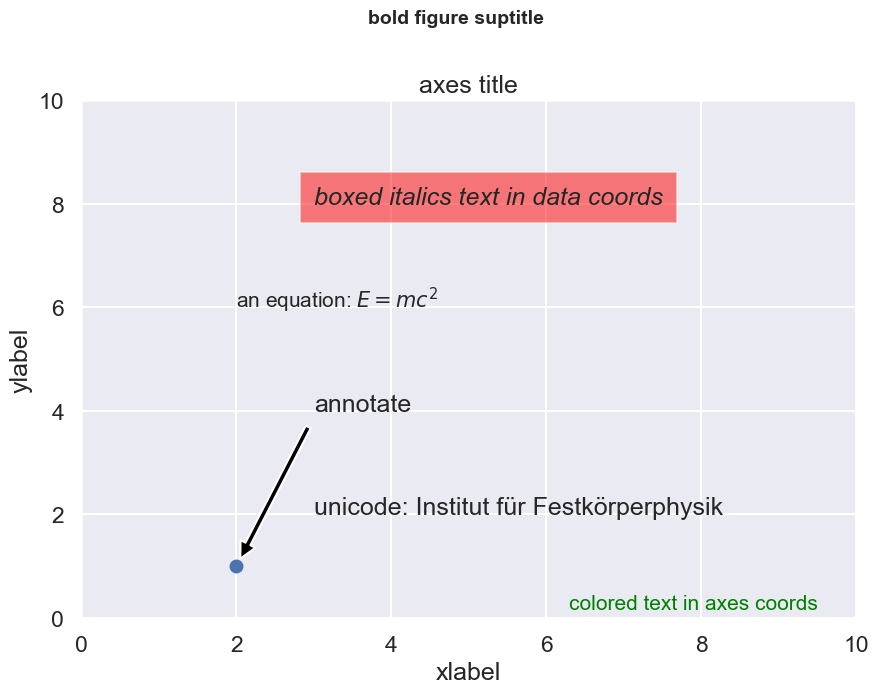

In [91]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, 'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10]);